In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Evaluate Catalogue Image Retrieval : `mobile foreground segmented vs catalogue`
- load distance_matrix and distance_dict pickle files generated using [`01-get-gist.py`](./01-get-gist.py), then [`02-get-distance.py`](./02-get-distance.py)

In [ ]:
import cPickle as pickle

### those pickle files are not provided due to privately own dataset
gist_path = '/your/distance_dict_mobile_vs_catalogue_euclidean.pickle'  # sorted distance per mobile image

with open(gist_path, 'rb') as handle:
    distance_dict = pickle.load(handle)
    'len(distance_dict): {0}'.format(len(distance_dict))
    
correct_match_dict = {}

for k, v in distance_dict.items():
    # return index where the same folder name occur, except for itself
    # k[73:84] is first part of imagename, e.g. /38712644oe, /12117636wf ...
    
    top_matched_index = [v.index(item) for item in v if k[73:84] in item[0]] # index of correctly closest match
    
    # in this case, index 0 means the query mobile image matches it's own catalogue image
    correct_match_dict[k] = top_matched_index 

In [ ]:
correct_match_dict

# will give:
#
#{'/your/mobile/image_1.jpg': [0],  # correctly matched to its' own catalogue image, i.e. the closest
# '/your/mobile/image_2.jpg': [2],  # correctly matched to its' own catalogue image, i.e. the 3rd closest  
# ... }

### Visualise successful examples

In [ ]:
distance_dict['/your/mobile/image_1.jpg']

# will give:
#[('/your/catalogue/image_1.jpg', 0.3749910891056061), # 1st closest is the matching catalogue image for '/your/mobile/image_1.jpg'
# ('/your/catalogue/image_7.jpg', 0.38256072998046875),
# ('/your/catalogue/image_10.jpg', 0.38495001196861267),
# ... ]

distance_dict['/your/mobile/image_2.jpg']

# will give:
#[('/your/catalogue/image_9.jpg', 0.3749910891056061),
# ('/your/catalogue/image_7.jpg', 0.38256072998046875),
# ('/your/catalogue/image_2.jpg', 0.38495001196861267), # 3rd closest is the matching catalogue image '/your/mobile/image_2.jpg'
# ... ]

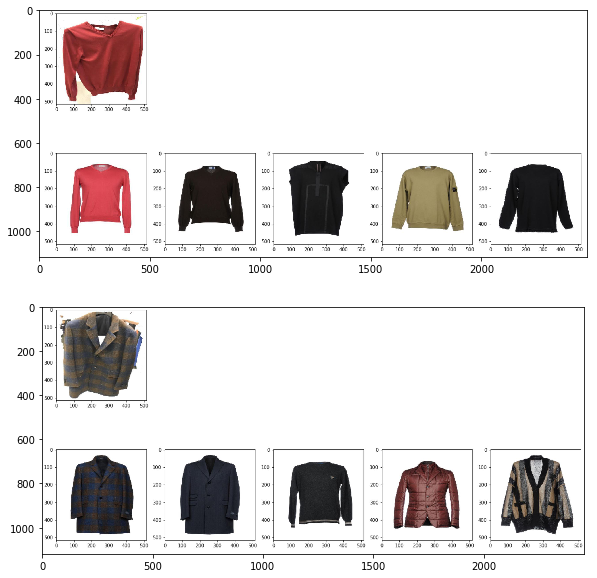

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(Image.open('./02-GIST-visual-results-example-1.JPG'))
plt.subplot(2,1,2)
plt.imshow(Image.open('./02-GIST-visual-results-example-2.JPG'))

## Evaluation
- with [`03-evaluate.py`](./03-evaluate.py), you will get accuracy for the top-nth best match, with result writen out to `.tsv` file for plotting.